## U-NSGA-III


The algorithm is implemented based on <cite data-cite="unsga3"></cite>. NSGA-III selects parents randomly for mating. It has been shown that tournament selection performs better than random selection. The *U* stands for *unified* and increases the performance of NSGA-III by introducing tournament pressure. 

The mating selections works as follows:


<div style="display: block;margin-left: auto;margin-right: auto;width: 45%;">
![unsga3_mating](../resources/images/unsga3_mating.png)
</div>

### Example

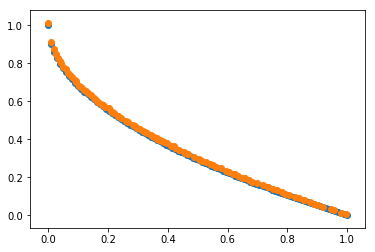

In [3]:
from pymoo.optimize import minimize
from pymoo.util import plotting
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymop.factory import get_problem
from pymoo.factory import get_algorithm

# create the reference directions to be used for the optimization
ref_dirs = UniformReferenceDirectionFactory(2, n_points=100).do()

# create the algorithm object
method = get_algorithm("nsga3",
                      pop_size=100,
                      ref_dirs=ref_dirs)

# create the test problem
problem = get_problem("zdt1")
pf = problem.pareto_front()


# execute the optimization
res = minimize(problem,
               method,
               termination=('n_gen', 150))

plotting.plot(pf, res.F, show=True)
